In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df=  df.drop(columns = ['customerID','Dependents','tenure','PhoneService','MultipleLines','StreamingMovies','DeviceProtection','StreamingTV','Contract','PaperlessBilling',
            'PaymentMethod'])

In [5]:
df.shape

(7043, 10)

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df.head()

,gender,SeniorCitizen,Partner,InternetService,OnlineSecurity,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,DSL,No,Yes,No,29.85,29.85,No
1,Male,0,No,DSL,Yes,No,No,56.95,1889.5,No
2,Male,0,No,DSL,Yes,Yes,No,53.85,108.15,Yes
3,Male,0,No,DSL,Yes,No,Yes,42.30,1840.75,No
4,Female,0,No,Fiber optic,No,No,No,70.70,151.65,Yes


In [8]:
df.isnull().sum()

gender             0
SeniorCitizen      0
Partner            0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
TechSupport        0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   object 
 3   InternetService  7043 non-null   object 
 4   OnlineSecurity   7043 non-null   object 
 5   OnlineBackup     7043 non-null   object 
 6   TechSupport      7043 non-null   object 
 7   MonthlyCharges   7043 non-null   float64
 8   TotalCharges     7043 non-null   object 
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 550.4+ KB


In [10]:
df.duplicated().value_counts()

False    6979
True       64
Name: count, dtype: int64

In [11]:
df.drop_duplicates()

,gender,SeniorCitizen,Partner,InternetService,OnlineSecurity,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,DSL,No,Yes,No,29.85,29.85,No
1,Male,0,No,DSL,Yes,No,No,56.95,1889.5,No
2,Male,0,No,DSL,Yes,Yes,No,53.85,108.15,Yes
3,Male,0,No,DSL,Yes,No,Yes,42.30,1840.75,No
4,Female,0,No,Fiber optic,No,No,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,DSL,Yes,No,Yes,84.80,1990.5,No
7039,Female,0,Yes,Fiber optic,No,Yes,No,103.20,7362.9,No
7040,Female,0,Yes,DSL,Yes,No,No,29.60,346.45,No
7041,Male,1,Yes,Fiber optic,No,No,No,74.40,306.6,Yes


In [12]:
df.describe()

,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
MonthlyCharges      0
TotalCharges       11
Churn               0
dtype: int64

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
df.isnull().sum()

gender             0
SeniorCitizen      0
Partner            0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
TechSupport        0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

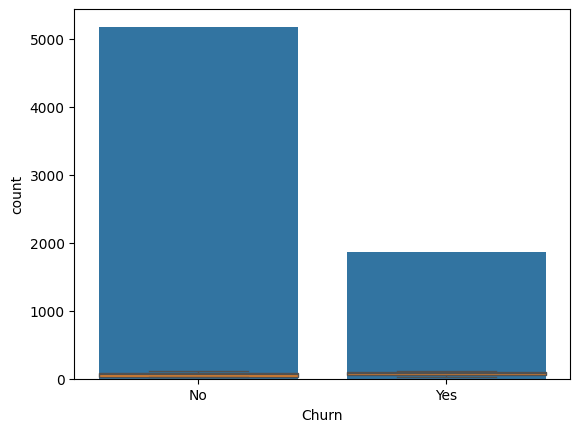

In [16]:
sns.countplot(x='Churn',data=df)
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

<Axes: xlabel='Churn', ylabel='count'>

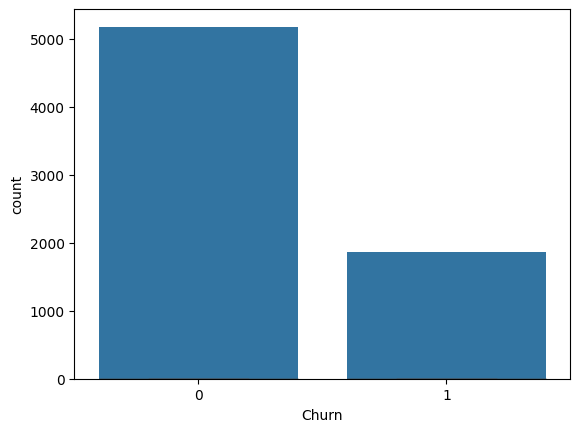

In [122]:
sns.countplot(x='Churn',data=df)
sns.boxplot(x='Churn',y='gender',data=df)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,InternetService,OnlineSecurity,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,DSL,No,Yes,No,29.85,29.85,No
1,Male,0,No,DSL,Yes,No,No,56.95,1889.50,No
2,Male,0,No,DSL,Yes,Yes,No,53.85,108.15,Yes
3,Male,0,No,DSL,Yes,No,Yes,42.30,1840.75,No
4,Female,0,No,Fiber optic,No,No,No,70.70,151.65,Yes


In [18]:
df['Partner'] = df['Partner'].map({'Yes':1,'No':0})

In [19]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [20]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [21]:
df = pd.get_dummies(df, columns=['InternetService','OnlineSecurity','OnlineBackup','TechSupport'], drop_first=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,29.85,29.85,0,False,False,False,False,False,True,False,False
1,1,0,0,56.95,1889.50,0,False,False,False,True,False,False,False,False
2,1,0,0,53.85,108.15,1,False,False,False,True,False,True,False,False
3,1,0,0,42.30,1840.75,0,False,False,False,True,False,False,False,True
4,0,0,0,70.70,151.65,1,True,False,False,False,False,False,False,False


In [61]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 ,random_state = 42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 13)
(1761, 13)
(5282,)
(1761,)


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler = scaler.fit_transform(df[['MonthlyCharges','TotalCharges']])

In [67]:
df.head()

,gender,SeniorCitizen,Partner,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,29.85,29.85,0,False,False,False,False,False,True,False,False
1,1,0,0,56.95,1889.50,0,False,False,False,True,False,False,False,False
2,1,0,0,53.85,108.15,1,False,False,False,True,False,True,False,False
3,1,0,0,42.30,1840.75,0,False,False,False,True,False,False,False,True
4,0,0,0,70.70,151.65,1,True,False,False,False,False,False,False,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              7043 non-null   int64  
 1   SeniorCitizen                       7043 non-null   int64  
 2   Partner                             7043 non-null   int64  
 3   MonthlyCharges                      7043 non-null   float64
 4   TotalCharges                        7043 non-null   float64
 5   Churn                               7043 non-null   int64  
 6   InternetService_Fiber optic         7043 non-null   bool   
 7   InternetService_No                  7043 non-null   bool   
 8   OnlineSecurity_No internet service  7043 non-null   bool   
 9   OnlineSecurity_Yes                  7043 non-null   bool   
 10  OnlineBackup_No internet service    7043 non-null   bool   
 11  OnlineBackup_Yes                    7043 no

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(max_iter=1000,class_weight = 'balanced')

In [71]:
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [72]:
y_pred = lr.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, roc_auc_score

In [74]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7552526973310619
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1282
           1       0.53      0.78      0.63       479

    accuracy                           0.76      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.76      0.77      1761



In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[957, 325],
       [106, 373]])

In [76]:
pd.Series(lr.coef_[0], index=X.columns).sort_values()

OnlineSecurity_Yes                   -0.640967
TechSupport_Yes                      -0.552088
InternetService_No                   -0.340893
OnlineSecurity_No internet service   -0.340893
OnlineBackup_No internet service     -0.340893
TechSupport_No internet service      -0.340893
Partner                              -0.218220
OnlineBackup_Yes                     -0.200861
gender                               -0.038012
TotalCharges                         -0.000407
MonthlyCharges                        0.017424
SeniorCitizen                         0.346207
InternetService_Fiber optic           0.835350
dtype: float64

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid,
    scoring='roc_auc',
    cv=5
)

grid.fit(X_train, y_train)

best_lr = grid.best_estimator_


In [78]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7552526973310619
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1282
           1       0.53      0.78      0.63       479

    accuracy                           0.76      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.76      0.77      1761



In [97]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=500,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

In [100]:
rfc.fit(X_train,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
y_pred = rfc.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7745599091425327
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1282
           1       0.57      0.73      0.64       479

    accuracy                           0.77      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.80      0.77      0.78      1761



In [103]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [104]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7745599091425327
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1282
           1       0.57      0.73      0.64       479

    accuracy                           0.77      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.80      0.77      0.78      1761



In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

In [111]:
lr = LogisticRegression(
    class_weight='balanced',   # IMPORTANT for churn
    max_iter=1000,
    solver='liblinear'
)

In [112]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2']
}


In [113]:
grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',   # BEST metric for churn
    cv=5,                # 5-fold cross validation
    n_jobs=-1            # use all CPU cores
)


In [114]:
grid.fit(X_train, y_train)


,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [115]:
grid.best_params_


{'C': 0.1, 'penalty': 'l1'}

In [116]:
grid.best_score_

np.float64(0.8156335715967422)

In [118]:
best_lr = grid.best_estimator_

In [119]:
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

In [120]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1282
           1       0.53      0.78      0.63       479

    accuracy                           0.75      1761
   macro avg       0.72      0.76      0.72      1761
weighted avg       0.80      0.75      0.77      1761



In [121]:
print(roc_auc_score(y_test, y_prob))

0.8394487345255816
